In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy import stats
from collections import Iterator
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import category_encoders as ce
from scipy.spatial import distance
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
import sqlalchemy
import pyodbc
import urllib

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


In [2]:
na=['na','Na','Nan','NaN','',' ']
data=pd.read_excel('./Week2_challenge_data_source.xlsx', na_values=na)

In [3]:
del data['End']
del data['Start']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

#cut_off1,cut_off2=Q1 - (1.5 * IQR), Q3 + (1.5 * IQR) #potential outliers lie outside the range 

data= data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data=data.loc[~data['MSISDN/Number'].isnull()]# remove rows without MSISDN

In [5]:
data.describe().to_csv('data_describe.csv') #Data Description

In [23]:
data1=data[['MSISDN/Number','Dur. (ms).1','Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]
data1

,MSISDN/Number,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
92,3.368542e+10,243504362.0,2410108.0,38223.0,6639041.0,433758.0,2653190.0,882020.0,17400892.0,14644405.0,7682779.0,20806551.0,519620584.0,2710989.0,318297673.0,3820483.0,43336429.0,556406594.0
93,3.366132e+10,236570803.0,3219754.0,10632.0,4259111.0,1476690.0,3507108.0,392491.0,19431593.0,16964908.0,11758420.0,9907089.0,715350506.0,10250922.0,290582586.0,1716480.0,40719212.0,757526492.0
95,3.361513e+10,231780395.0,2564038.0,6720.0,962332.0,38013.0,3144169.0,64850.0,7438887.0,13154981.0,753238.0,9887128.0,124180544.0,14967821.0,350039548.0,14932623.0,53052136.0,139043208.0
96,3.366495e+10,230839500.0,2555939.0,43849.0,8477509.0,1481177.0,3380596.0,156347.0,3334865.0,14454366.0,17917894.0,1530332.0,293492651.0,1362536.0,495376623.0,11684759.0,30713366.0,329159454.0
97,3.366403e+10,238915484.0,3457278.0,32564.0,721187.0,4000586.0,1907310.0,591277.0,23039020.0,21457678.0,1114842.0,13958301.0,516508263.0,8432981.0,624397048.0,9207067.0,57680454.0,546747900.0
98,3.366875e+10,239954258.0,504262.0,64651.0,6798.0,553968.0,832675.0,500257.0,14851113.0,1312259.0,11225027.0,15097330.0,522050751.0,1138947.0,281699270.0,3082007.0,21749419.0,549470626.0
100,3.362897e+10,239271100.0,2702530.0,29784.0,10037247.0,815983.0,2167338.0,292895.0,15621950.0,10898247.0,8651897.0,21861824.0,110876905.0,11543648.0,111048624.0,5577081.0,51019462.0,150057867.0
105,3.366500e+10,226854626.0,2307182.0,26346.0,7753812.0,163450.0,2541057.0,506579.0,274514.0,8342280.0,18191415.0,295954.0,645785450.0,12148467.0,277617367.0,13922228.0,35405304.0,676853430.0
106,3.366592e+10,240591879.0,2117287.0,56166.0,8308882.0,1700396.0,697066.0,397507.0,21100158.0,17582329.0,23010525.0,9778584.0,391789247.0,9159469.0,218272796.0,7356123.0,46030574.0,447023165.0
107,3.366030e+10,234009476.0,430501.0,38121.0,11574.0,2228336.0,1466633.0,465442.0,4873934.0,18725755.0,4023334.0,20334080.0,817430691.0,6183136.0,397231763.0,13619094.0,61593964.0,828236667.0


In [7]:
data1.quantile([0.25,0.5,0.75])

,MSISDN/Number,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0.25,3.364513e+10,6.709769e+07,903387.0,16292.75,2880102.75,1030669.0,892613.50,233454.25,5808047.25,5571982.75,5783585.25,5454528.5,2.108734e+08,4125472.25,2.097628e+08,4146505.00,33206937.75,2.432760e+08
0.50,3.366148e+10,9.931466e+07,1791015.5,32886.00,5750143.50,2045660.0,1797649.50,464128.00,11549117.00,11067655.50,11664796.00,10954074.5,4.246827e+08,8290952.50,4.204006e+08,8252523.00,41166059.00,4.573569e+08
0.75,3.366809e+10,1.461844e+08,2700361.0,49356.25,8619448.00,3088464.0,2688359.75,699120.00,17395841.75,16529466.25,17461206.50,16470461.5,6.341904e+08,12423399.50,6.306964e+08,12370286.25,48998771.00,6.667183e+08


,Total,Percent
Nb of sec with 37500B < Vol UL,63884,100.000000
Nb of sec with 6250B < Vol UL < 37500B,63088,98.753992
Nb of sec with 125000B < Vol DL,61246,95.870641
TCP UL Retrans. Vol (Bytes),60324,94.427400
Nb of sec with 1250B < Vol UL < 6250B,60007,93.931188


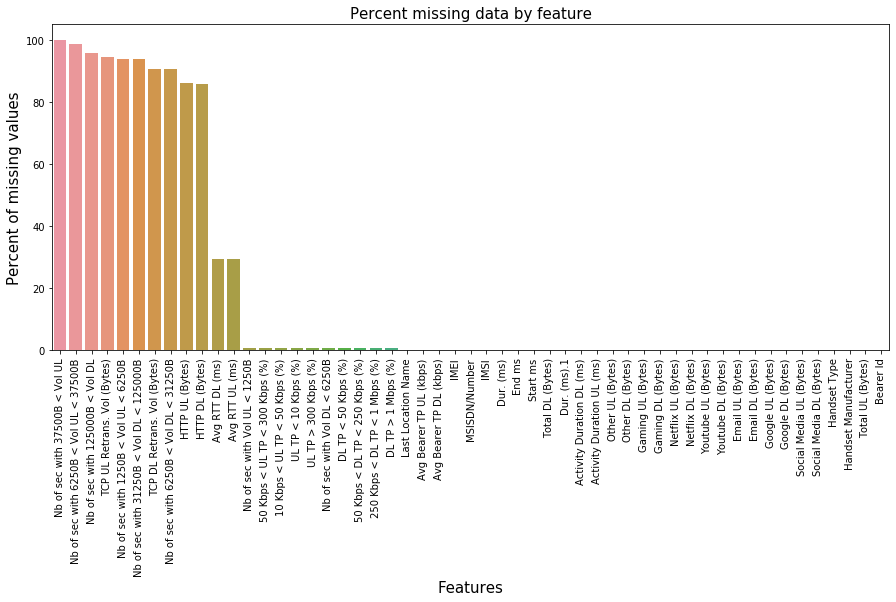

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent=100*percent
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [14]:
100*(len(data)-len(data1))/len(data)  ##percentage of outliers

100.0

since the outliers is about 20%

In [9]:
data1.isnull().sum()

MSISDN/Number              0
Dur. (ms).1                0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
Total UL (Bytes)           0
Total DL (Bytes)           0
dtype: int64

In [63]:
len(data1['MSISDN/Number'].unique()) #No of unique user

86968

In [71]:
data1.columns

Index(['MSISDN/Number', 'Dur. (ms)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

In [24]:
data1[['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]=data1[['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]/(1024*1024)    ## converting to megabyte 

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [119]:
data1.columns

Index(['MSISDN/Number', 'Dur. (ms).1', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Dur. (ms)'],
      dtype='object')

In [25]:

data1['Dur. (ms).1']=data1['Dur. (ms).1']/(1000*60) # converting to seconds
data1.columns=['MSISDN/Number', 'Dur. (s)', 'Social Media DL (MBytes)',
       'Social Media UL (MBytes)', 'Google DL (MBytes)', 'Google UL (MBytes)',
       'Email DL (MBytes)', 'Email UL (MBytes)', 'Youtube DL (MBytes)',
       'Youtube UL (MBytes)', 'Netflix DL (MBytes)', 'Netflix UL (MBytes)',
       'Gaming DL (MBytes)', 'Gaming UL (MBytes)', 'Other DL (MBytes)',
       'Other UL (MBytes)', 'Total UL (MBytes)', 'Total DL (MBytes)']
data1

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MSISDN/Number,Dur. (s),Social Media DL (MBytes),Social Media UL (MBytes),Google DL (MBytes),Google UL (MBytes),Email DL (MBytes),Email UL (MBytes),Youtube DL (MBytes),Youtube UL (MBytes),Netflix DL (MBytes),Netflix UL (MBytes),Gaming DL (MBytes),Gaming UL (MBytes),Other DL (MBytes),Other UL (MBytes),Total UL (MBytes),Total DL (MBytes)
92,3.368542e+10,4058.406033,2.298458,0.036452,6.331483,0.413664,2.530279,0.841160,16.594784,13.965993,7.326869,19.842673,495.548805,2.585401,303.552316,3.643497,41.328839,530.630678
93,3.366132e+10,3942.846717,3.070597,0.010139,4.061805,1.408281,3.344639,0.374309,18.531411,16.178997,11.213703,9.448136,682.211405,9.776041,277.121149,1.636963,38.832867,722.433559
95,3.361513e+10,3863.006583,2.445257,0.006409,0.917751,0.036252,2.998513,0.061846,7.094275,12.545568,0.718344,9.429100,118.427795,14.274426,333.823727,14.240859,50.594460,132.601936
96,3.366495e+10,3847.325000,2.437533,0.041818,8.084783,1.412560,3.223988,0.149104,3.180375,13.784758,17.087835,1.459438,279.896403,1.299416,472.427962,11.143455,29.290548,313.910917
97,3.366403e+10,3981.924733,3.297117,0.031055,0.687778,3.815256,1.818953,0.563886,21.971722,20.463636,1.063196,13.311673,492.580665,8.042317,595.471428,8.780543,55.008368,521.419430
98,3.366875e+10,3999.237633,0.480902,0.061656,0.006483,0.528305,0.794101,0.477082,14.163125,1.251468,10.705020,14.397936,497.866393,1.086185,268.649359,2.939231,20.741862,524.016024
100,3.362897e+10,3987.851667,2.577333,0.028404,9.572265,0.778182,2.066935,0.279326,14.898252,10.393378,8.251092,20.849060,105.740457,11.008881,105.904221,5.318719,48.655951,143.106334
105,3.366500e+10,3780.910433,2.200300,0.025126,7.394611,0.155878,2.423341,0.483111,0.261797,7.955818,17.348685,0.282244,615.868998,11.585681,264.756553,13.277271,33.765129,645.497732
106,3.366592e+10,4009.864650,2.019202,0.053564,7.923967,1.621624,0.664774,0.379092,20.122679,16.767816,21.944547,9.325584,373.639342,8.735150,208.161160,7.015346,43.898176,426.314511
107,3.366030e+10,3900.157933,0.410558,0.036355,0.011038,2.125107,1.398690,0.443880,4.648146,17.858272,3.836950,19.392090,779.562655,5.896698,378.829730,12.988180,58.740582,789.868037


In [26]:
data_i=data1.copy()

In [27]:
data_i['Total data (MBytes)']=data_i['Total UL (MBytes)']+data_i['Total DL (MBytes)']
data_i['Total Google data (MBytes)']=data_i['Google UL (MBytes)']+data_i['Google DL (MBytes)']
data_i['Total Social Media data (MBytes)']=data_i['Social Media UL (MBytes)']+data_i['Social Media DL (MBytes)']
data_i['Total Email data (MBytes)']=data_i['Email UL (MBytes)']+data_i['Email DL (MBytes)']
data_i['Total Youtube data (MBytes)']=data_i['Youtube UL (MBytes)']+data_i['Youtube DL (MBytes)']
data_i['Total Netflix data (MBytes)']=data_i['Netflix UL (MBytes)']+data_i['Netflix DL (MBytes)']
data_i['Total Gaming data (MBytes)']=data_i['Gaming UL (MBytes)']+data_i['Gaming DL (MBytes)']
data_i['Total Other data (MBytes)']=data_i['Other UL (MBytes)']+data_i['Other DL (MBytes)']


In [29]:
data_i.columns[:]

Index(['MSISDN/Number', 'Dur. (s)', 'Social Media DL (MBytes)',
       'Social Media UL (MBytes)', 'Google DL (MBytes)', 'Google UL (MBytes)',
       'Email DL (MBytes)', 'Email UL (MBytes)', 'Youtube DL (MBytes)',
       'Youtube UL (MBytes)', 'Netflix DL (MBytes)', 'Netflix UL (MBytes)',
       'Gaming DL (MBytes)', 'Gaming UL (MBytes)', 'Other DL (MBytes)',
       'Other UL (MBytes)', 'Total UL (MBytes)', 'Total DL (MBytes)',
       'Total data (MBytes)', 'Total Google data (MBytes)',
       'Total Social Media data (MBytes)', 'Total Email data (MBytes)',
       'Total Youtube data (MBytes)', 'Total Netflix data (MBytes)',
       'Total Gaming data (MBytes)', 'Total Other data (MBytes)'],
      dtype='object')

In [30]:
data_i.drop([i for i in data_i.columns[2:18]],axis=1, inplace=True)
data_i.groupby(['MSISDN/Number']).count().sort_values(by='Dur. (s)').tail(10)

,Dur. (s),Total data (MBytes),Total Google data (MBytes),Total Social Media data (MBytes),Total Email data (MBytes),Total Youtube data (MBytes),Total Netflix data (MBytes),Total Gaming data (MBytes),Total Other data (MBytes)
MSISDN/Number,,,,,,,,,
3.366383e+10,6,6,6,6,6,6,6,6,6
3.361471e+10,6,6,6,6,6,6,6,6,6
3.360998e+10,6,6,6,6,6,6,6,6,6
3.364618e+10,6,6,6,6,6,6,6,6,6
3.366020e+10,6,6,6,6,6,6,6,6,6
3.360658e+10,7,7,7,7,7,7,7,7,7
3.366025e+10,7,7,7,7,7,7,7,7,7
3.369966e+10,7,7,7,7,7,7,7,7,7
3.367608e+10,7,7,7,7,7,7,7,7,7


In [31]:
data_i.columns

Index(['MSISDN/Number', 'Dur. (s)', 'Total data (MBytes)',
       'Total Google data (MBytes)', 'Total Social Media data (MBytes)',
       'Total Email data (MBytes)', 'Total Youtube data (MBytes)',
       'Total Netflix data (MBytes)', 'Total Gaming data (MBytes)',
       'Total Other data (MBytes)'],
      dtype='object')

In [32]:
data_i.drop(['MSISDN/Number'],axis=1,inplace=True)


In [33]:
data_i.describe()#.to_csv('describe.csv')

,Dur. (s),Total data (MBytes),Total Google data (MBytes),Total Social Media data (MBytes),Total Email data (MBytes),Total Youtube data (MBytes),Total Netflix data (MBytes),Total Gaming data (MBytes),Total Other data (MBytes)
count,63884.000000,63884.000000,63884.000000,63884.000000,63884.000000,63884.000000,63884.000000,63884.000000,63884.000000
mean,1770.395974,473.241217,7.441235,1.745397,2.154041,21.579961,21.542102,410.904008,408.719589
std,891.289733,233.191481,3.357125,0.988152,1.021690,8.811443,8.831772,232.812371,232.213806
min,121.413367,27.614696,0.064077,0.001491,0.007972,0.075248,0.176019,0.292166,0.867578
25%,1118.294762,271.658575,4.708760,0.892389,1.294125,15.224941,15.200933,208.935731,208.198736
50%,1655.244267,475.132104,7.441121,1.739615,2.161681,21.593701,21.548452,412.826542,409.105214
75%,2436.405963,674.765827,10.187985,2.605785,3.011889,27.917919,27.896562,612.548993,609.262380
max,4081.666917,906.716023,14.809401,3.481732,4.308735,43.096617,43.095111,818.875084,819.703039


In [120]:
data_i.quantile([0.25,0.5,0.75])

,Dur. (s),Total data (MBytes),Total Google data (MBytes),Total Social Media data (MBytes),Total Email data (MBytes),Total Youtube data (MBytes),Total Netflix data (MBytes),Total Gaming data (MBytes),Total Other data (MBytes)
0.25,54.40575,271.879869,4.712322,0.888987,1.295274,15.253390,15.249600,209.288381,208.538915
0.50,86.39900,475.140056,7.449817,1.739223,2.155215,21.601709,21.601301,412.759490,409.700840
0.75,120.38000,674.547452,10.178602,2.602118,3.012089,27.905736,27.908851,612.326320,609.518842


##The dataset is large , there is need for subsampling for easy visualization

In [86]:
dfSample=data_i.sample(500)

dfSample.describe()

,Dur. (s),Total data (MBytes),Total Google data (MBytes),Total Social Media data (MBytes),Total Email data (MBytes),Total Youtube data (MBytes),Total Netflix data (MBytes),Total Gaming data (MBytes),Total Other data (MBytes)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,83.408902,478.207355,7.593877,1.798062,2.147708,21.578274,21.614970,415.572635,411.710555
std,22.961331,183.134321,2.685548,0.838078,0.829420,7.047230,6.834284,182.569963,187.136325
min,23.405000,51.642089,0.308484,0.039990,0.143861,0.944834,0.648956,4.979112,1.742714
25%,86.395250,385.991001,6.644975,1.459619,1.763295,19.064998,18.740082,317.415551,353.540853
50%,86.399000,475.188202,7.454777,1.740233,2.151704,21.560426,21.594588,412.820937,409.802943
75%,86.399000,565.300660,8.937849,2.273591,2.572831,24.343467,24.352320,500.596121,501.549815
max,149.717000,882.288667,14.343274,3.427913,4.186579,40.345437,41.701988,801.525800,809.618046


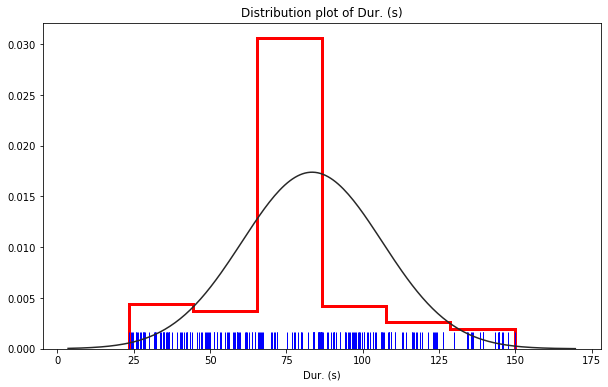

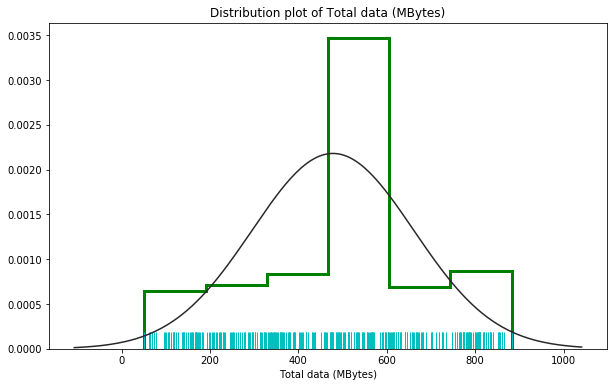

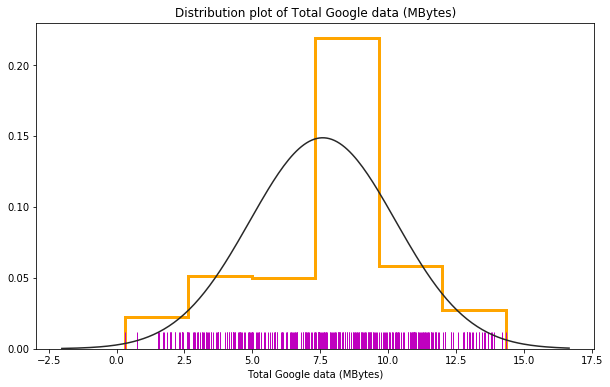

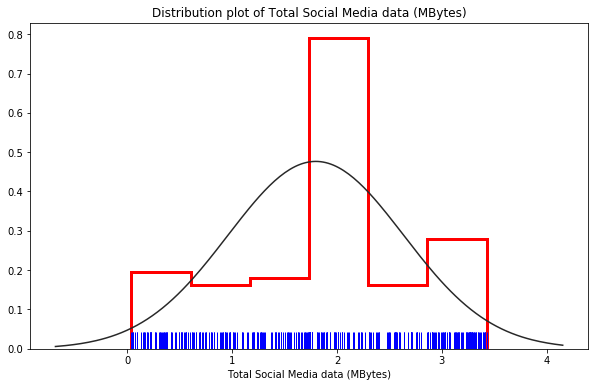

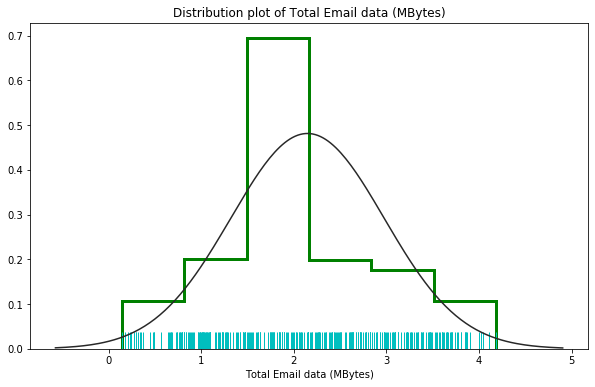

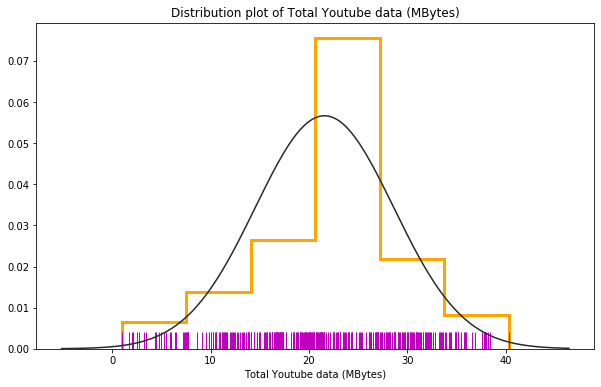

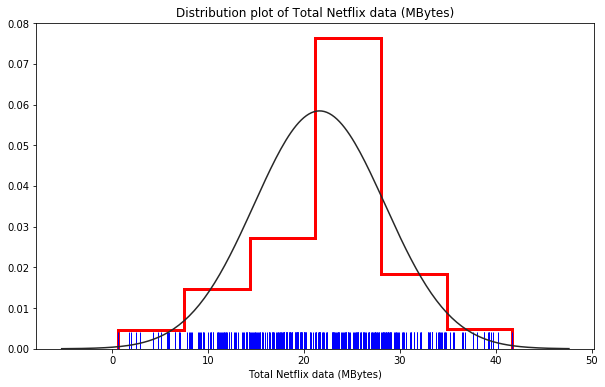

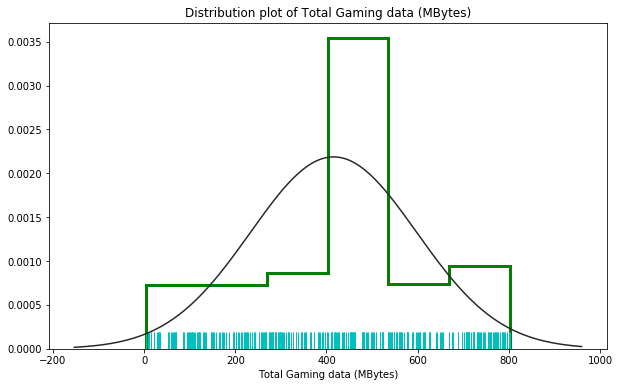

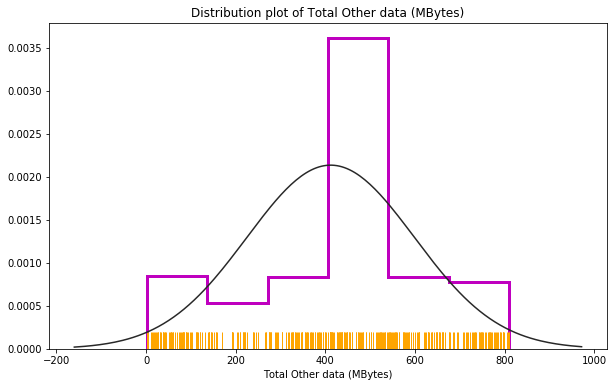

In [95]:
## Graphical Univariate Analysis
colour=['r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange',
       'r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange']
colour=iter(colour)
for i in dfSample.columns:
    name=i
    fig,ax=plt.subplots(figsize=(10, 6))
    c1=next(colour)
    c2=next(colour)
    sns.distplot(dfSample[i],ax=ax,bins=6,color=c1,rug=True,fit=norm,kde=False,
                 rug_kws={"color": c2},
                hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": c1})
    #ax.set_xlabel\
    ax.set_title('Distribution plot of {0}'.format(i))
    
    fig.savefig(name+'.jpg')
    
    plt.show()

In [91]:
dfSample.columns

Index(['Dur. (s)', 'Total data (MBytes)', 'Total Google data (MBytes)',
       'Total Social Media data (MBytes)', 'Total Email data (MBytes)',
       'Total Youtube data (MBytes)', 'Total Netflix data (MBytes)',
       'Total Gaming data (MBytes)', 'Total Other data (MBytes)'],
      dtype='object')

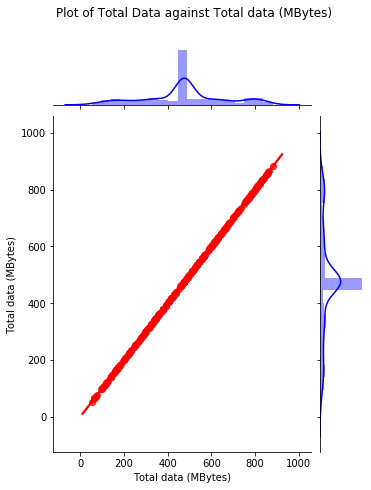

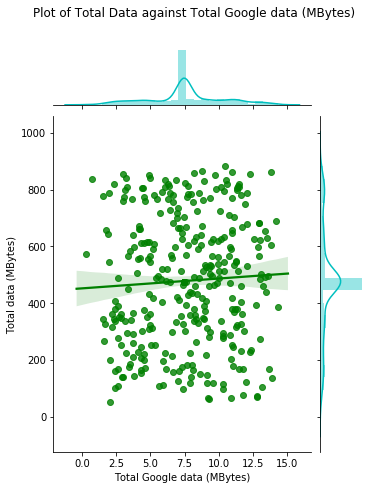

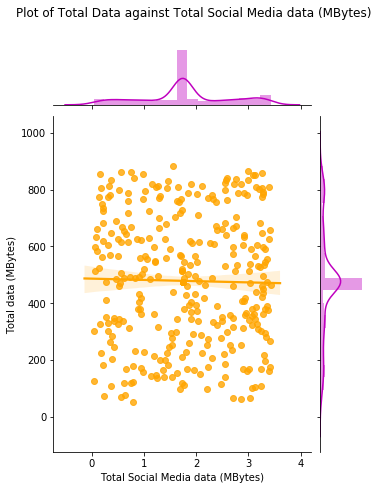

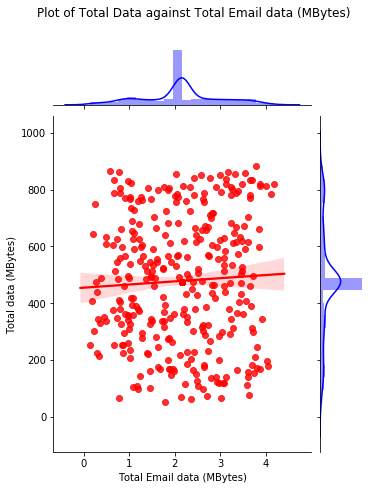

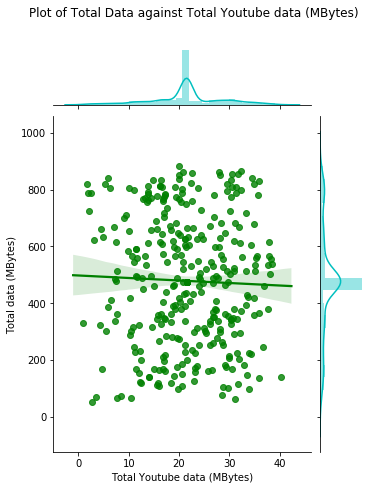

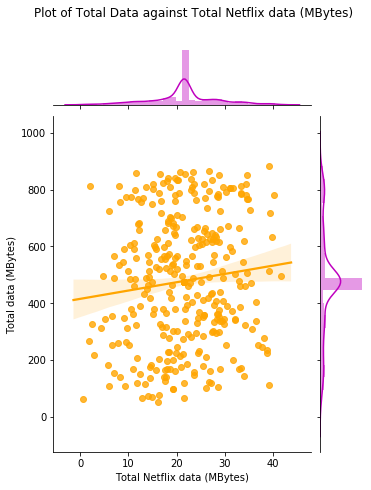

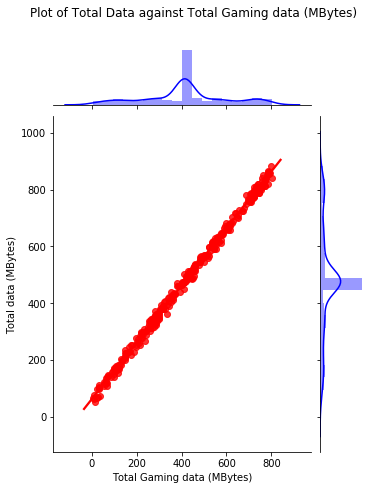

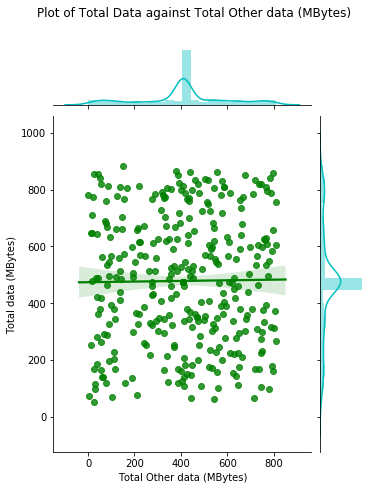

In [94]:
#Graphical Bivariate analysis
#dfSample.plot.hexbin(x='Total Google data', y='Total data', gridsize=15)

colour=['r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange',
       'r','b','g','c','orange','m','r','b','g','c','orange','m','r','b','g','c','m','orange']
colour=iter(colour)
for i in dfSample.columns[1:]:
    if i not in['Total data','Dur. (ms)']:
        name=i
        #fig,ax=plt.subplots(figsize=(15, 6))
        c1=next(colour)
        c2=next(colour)
        g = sns.JointGrid(x=i, y='Total data (MBytes)', data=dfSample)
        g = g.plot_joint(sns.regplot,color=c1)
        g = g.plot_marginals(sns.distplot, kde=True, color=c2)
        #g=sns.jointplot(x=i, y='Total data', data=dfSample,kind="hex", color=c1)
        #ax.set_xlabel
        plt.subplots_adjust(top=0.9)
        g.fig.set_size_inches(5,7)
        g.fig.suptitle('Plot of Total Data against {0}'.format(i))
        g.savefig(name+ 'Total'+'.jpg')
        plt.show()

In [35]:
data_i.corr().to_csv('Correlation_1.csv')

In [123]:
scaler = StandardScaler()
data_is=scaler.fit_transform(data_i)

In [124]:
#Dimensionality Reduction
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(data_is)
# transform data onto the first two principal components
X_pca = pca.transform(data_is)
print("Original shape: {}".format(str(data_is.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (119704, 9)
Reduced shape: (119704, 2)


Text(0, 0.5, 'Second principal component')

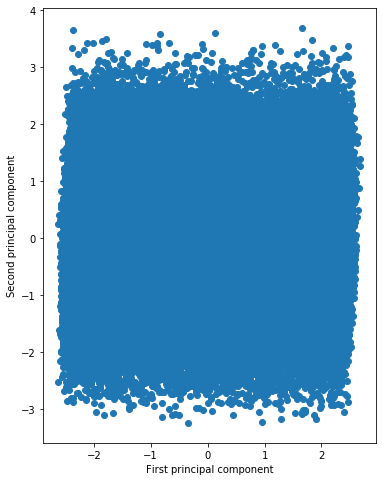

In [127]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

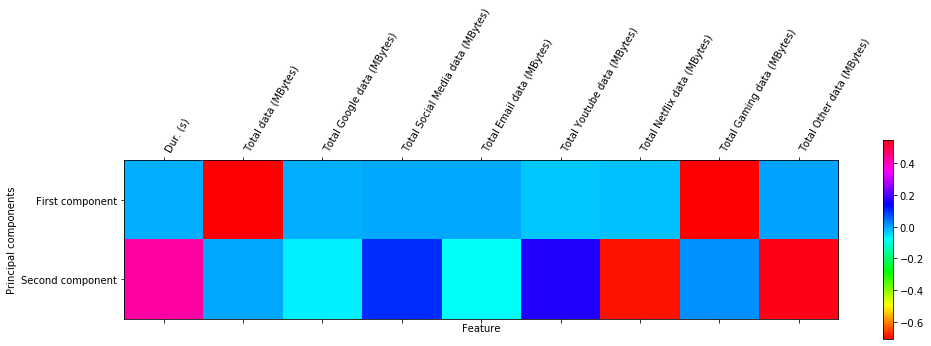

In [139]:
plt.matshow(pca.components_, cmap='hsv')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(data_i.columns)),data_i.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.savefig('pac.jpg',bbox_inches='tight')

In [17]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [55]:
data2=data[['MSISDN/Number','Dur. (ms).1','Total UL (Bytes)', 'Total DL (Bytes)']]


In [255]:
len(data2['MSISDN/Number'].unique())

53259

In [58]:
data_2=data2.copy()
data_2['Dur. (m)']=data_2['Dur. (ms).1']/(1000000*60)
del data_2['Dur. (ms).1']
data_2.dropna(inplace=True)
data_2['Total Data']=data2['Total UL (Bytes)'] +data2['Total DL (Bytes)']
data_2.drop(['Total UL (Bytes)', 'Total DL (Bytes)'],axis=1,inplace=True)

In [59]:
#No of sessions
g1=data_2.groupby(['MSISDN/Number']).count().sort_values(by='Dur. (m)') 
#g1=g1.tail(10)

g1.tail(10).to_csv('user_count.csv')

In [60]:
#Total Data
g2=data_2.pivot_table('Total Data', index=['MSISDN/Number'],aggfunc=sum)
g2=g2.sort_values(by='Total Data')#.tail(10)
g2.tail(10).to_csv('user_totaldata.csv')

In [61]:
g3=data_2.pivot_table('Dur. (m)', index=['MSISDN/Number'],aggfunc=sum) #Duration
g3=g3.sort_values(by='Dur. (m)')
g3.tail(10).to_csv('user_duration.csv')

In [62]:
def normalize(x):
    return (x - x.mean()) / x.std()


In [63]:
g1_a=g1.transform(normalize)
g2_a=g2.transform(normalize)
g3_a=g3.transform(normalize)

In [64]:
cluster_data=pd.DataFrame({'TD':g2_a['Total Data'],'Dur':g3_a['Dur. (m)'],'c':g1_a['Dur. (m)']})
cluster_data.isnull().sum()

TD     0
Dur    0
c      0
dtype: int64

In [42]:
cluster_data.fillna(0,inplace=True)

In [43]:
len(data2['MSISDN/Number'].unique())

106856

In [270]:
cluster_data

,TD,Dur,c,kpredict
MSISDN/Number,,,,
3.360301e+10,0.131213,-0.087623,1.636363,2
3.360301e+10,0.746618,0.102629,-0.407805,2
3.360301e+10,-0.412365,0.105718,-0.407805,0
3.360301e+10,0.525734,2.353719,1.636363,1
3.360302e+10,-0.524926,-1.322656,-0.407805,0
3.360302e+10,0.225241,0.003517,-0.407805,2
3.360302e+10,-0.079892,1.112927,-0.407805,2
3.360302e+10,-0.505065,-1.149386,-0.407805,0
3.360302e+10,-1.011619,-0.797570,-0.407805,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

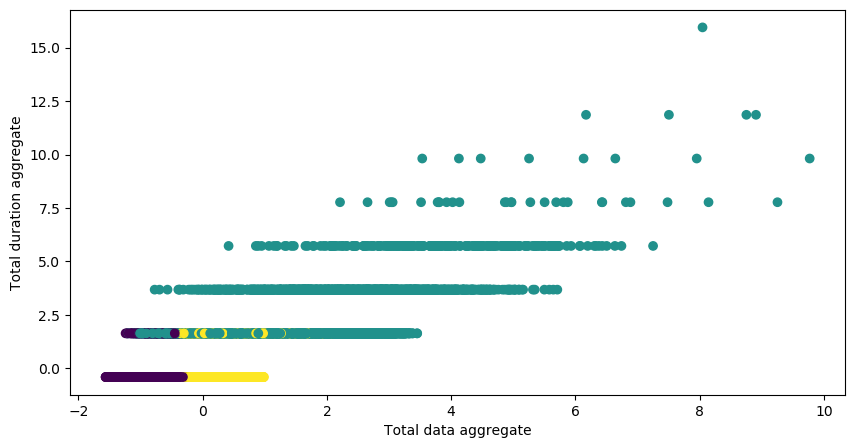

In [65]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10, 5))
X=cluster_data.values
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X)
assignments = kmeans2.labels_
ax.scatter(X[:, 0], X[:, 2], c=assignments,marker='o')
#ax.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],marker='^',c='r',s=[120,150])
ax.set_xlabel('Total data aggregate', size=10)
ax.set_ylabel('Total duration aggregate',size=10)
fig.savefig('cluster_aggrregate.jpg')

In [67]:
#Assigning labels
kpredict=kmeans2.predict(cluster_data.values)
cluster_data['kpredict']=kpredict
#cluster_data

In [269]:
len(data_g)

86967

In [68]:
cluster1=cluster_data.loc[cluster_data['kpredict']==0]
cluster2=cluster_data.loc[cluster_data['kpredict']==1]
cluster3=cluster_data.loc[cluster_data['kpredict']==2]

In [70]:
#Non Normalization
cluster_data['TD']=cluster_data['TD']*g2['Total Data'].std()+g2['Total Data'].mean()
cluster_data['Dur']=cluster_data['Dur']*g3['Dur. (m)'].std()+g3['Dur. (m)'].mean()
cluster_data['c']=cluster_data['c']*g1['Dur. (m)'].std()+g1['Dur. (m)'].mean()
cluster_data

,TD,Dur,c,kpredict
MSISDN/Number,,,,
3.360301e+10,2.312911e+17,2.005435,2.0,2
3.360301e+10,3.110507e+17,2.261982,1.0,2
3.360301e+10,1.608407e+17,2.266143,1.0,0
3.360301e+10,2.824229e+17,5.297530,2.0,1
3.360302e+10,1.462522e+17,0.340014,1.0,0
3.360302e+10,2.434776e+17,2.128327,1.0,2
3.360302e+10,2.039308e+17,3.624340,1.0,2
3.360302e+10,1.488264e+17,0.573658,1.0,0
3.360302e+10,8.317444e+16,1.048075,1.0,0


In [72]:
#Non Normalization
cluster1['TD']=cluster1['TD']*g2['Total Data'].std()+g2['Total Data'].mean()
cluster1['Dur']=cluster1['Dur']*g3['Dur. (m)'].std()+g3['Dur. (m)'].mean()
cluster1['c']=cluster1['c']*g1['Dur. (m)'].std()+g1['Dur. (m)'].mean()
cluster1=cluster1[cluster1>=0] # eliminate excess 
cluster1

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,TD,Dur,c,kpredict
MSISDN/Number,,,,
3.360301e+10,1.608407e+17,2.266143,1.0,0
3.360302e+10,1.462522e+17,0.340014,1.0,0
3.360302e+10,1.488264e+17,0.573658,1.0,0
3.360302e+10,8.317444e+16,1.048075,1.0,0
3.360307e+10,1.422487e+17,0.293454,1.0,0
3.360308e+10,1.655906e+17,1.220404,1.0,0
3.360308e+10,1.487412e+17,0.323153,1.0,0
3.360311e+10,3.758137e+16,0.497063,1.0,0
3.360311e+10,2.334281e+16,0.911936,1.0,0


In [73]:
#Non Normalization
cluster2['TD']=cluster2['TD']*g2['Total Data'].std()+g2['Total Data'].mean()
cluster2['Dur']=cluster2['Dur']*g3['Dur. (m)'].std()+g3['Dur. (m)'].mean()
cluster2['c']=cluster2['c']*g1['Dur. (m)'].std()+g1['Dur. (m)'].mean()
cluster2=cluster2[cluster2>=0]
#cluster2

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [74]:
#Non Normalization
cluster3['TD']=cluster3['TD']*g2['Total Data'].std()+g2['Total Data'].mean()
cluster3['Dur']=cluster3['Dur']*g3['Dur. (m)'].std()+g3['Dur. (m)'].mean()
cluster3['c']=cluster3['c']*g1['Dur. (m)'].std()+g1['Dur. (m)'].mean()
cluster3=cluster3[cluster3>=0]
#cluster2

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [75]:
cluster1.describe().to_csv('cluster1_1.csv')

In [76]:
cluster2.describe().to_csv('cluster2_1.csv')

In [77]:
cluster3.describe().to_csv('cluster3_1.csv')

In [186]:
data.columns
data2=data[['MSISDN/Number','Dur. (ms)','Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]

In [187]:

data_i=data2

In [188]:
data_i['Total data (Bytes)']=data_i['Total UL (Bytes)']+data_i['Total DL (Bytes)']
data_i['Total Google data (Bytes)']=data_i['Google UL (Bytes)']+data_i['Google DL (Bytes)']
data_i['Total Social Media data (Bytes)']=data_i['Social Media UL (Bytes)']+data_i['Social Media DL (Bytes)']
data_i['Total Email data (Bytes)']=data_i['Email UL (Bytes)']+data_i['Email DL (Bytes)']
data_i['Total Youtube data (Bytes)']=data_i['Youtube UL (Bytes)']+data_i['Youtube DL (Bytes)']
data_i['Total Netflix data (Bytes)']=data_i['Netflix UL (Bytes)']+data_i['Netflix DL (Bytes)']
data_i['Total Gaming data (Bytes)']=data_i['Gaming UL (Bytes)']+data_i['Gaming DL (Bytes)']
data_i['Total Other data (Bytes)']=data_i['Other UL (Bytes)']+data_i['Other DL (Bytes)']


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [150]:
data_i.drop([i for i in data_i.columns[2:18]],axis=1, inplace=True)
data_i.columns

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['MSISDN/Number', 'Dur. (ms)', 'Total data (Bytes)',
       'Total Google data (Bytes)', 'Total Social Media data (Bytes)',
       'Total Email data (Bytes)', 'Total Youtube data (Bytes)',
       'Total Netflix data (Bytes)', 'Total Gaming data (Bytes)',
       'Total Other data (Bytes)'],
      dtype='object')

In [189]:
len(data_i)
#data_i.isnull().sum()

118675

In [152]:

for i in data_i.columns[1:]:
    g1=data_i.groupby(['MSISDN/Number']).sum().sort_values(by=i).tail(10)
    g1.to_csv(i+'_10.csv')

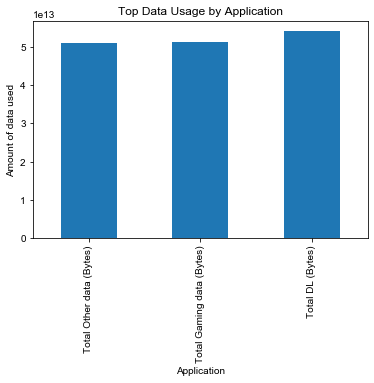

In [61]:

data_i.drop(['Dur. (ms)','Total data (Bytes)'],axis=1).groupby(['MSISDN/Number']).sum().sum().sort_values()[-3:].plot(kind='bar')
plt.title('Top Data Usage by Application')
plt.style.use('seaborn')
plt.ylabel('Amount of data used')
plt.xlabel('Application')
plt.savefig('Top3.jpg',bbox_inches='tight')

In [185]:
len(data_i)

118675

In [153]:
data_g=data_i.drop(['Dur. (ms)','Total data (Bytes)'],axis=1).groupby(['MSISDN/Number']).sum()
data_g.columns

Index(['Total Google data (Bytes)', 'Total Social Media data (Bytes)',
       'Total Email data (Bytes)', 'Total Youtube data (Bytes)',
       'Total Netflix data (Bytes)', 'Total Gaming data (Bytes)',
       'Total Other data (Bytes)'],
      dtype='object')

In [63]:
x=data_g.values
scaler=StandardScaler().fit(x)
newx=scaler.transform(x)
kmax = 10
sil=[]

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(newx)
    labels = kmeans.labels_
    sil.append(silhouette_score(newx, labels, metric = 'euclidean'))

rangex=range(2,kmax+1)
fig,ax=plt.subplots()
ax.plot(rangex,sil)
ax.set_xlabel('No of Cluster', size=10)
ax.set_ylabel('Silhouettescore', size=10)
fig.savefig('sil plot.jpg')

KeyboardInterrupt: 

In [64]:
kmeans = KMeans(n_clusters = 2).fit(newx)

In [302]:
#data_g['predict']=kpredict

In [157]:
data_g.loc[data_g['predict']==0].describe()

,Total Google data (Bytes),Total Social Media data (Bytes),Total Email data (Bytes),Total Youtube data (Bytes),Total Netflix data (Bytes),Total Gaming data (Bytes),Total Other data (Bytes),predict
count,1.771000e+04,1.771000e+04,1.771000e+04,1.771000e+04,1.771000e+04,1.771000e+04,1.771000e+04,17710.0
mean,1.626105e+07,3.821975e+06,4.697069e+06,4.710183e+07,4.719328e+07,9.143144e+08,8.937312e+08,0.0
std,5.536046e+06,1.585694e+06,1.700724e+06,1.498270e+07,1.506230e+07,3.285449e+08,3.783758e+08,0.0
min,1.346703e+06,3.819000e+04,2.009670e+05,2.482226e+06,1.388893e+06,3.463966e+07,1.514193e+07,0.0
25%,1.240011e+07,2.683302e+06,3.522950e+06,3.680578e+07,3.703880e+07,6.882180e+08,6.217100e+08,0.0
50%,1.606571e+07,3.780074e+06,4.617172e+06,4.650664e+07,4.663648e+07,9.063135e+08,8.813658e+08,0.0
75%,1.984298e+07,4.910457e+06,5.816237e+06,5.656345e+07,5.660863e+07,1.148105e+09,1.153579e+09,0.0
max,4.067966e+07,1.252275e+07,1.238354e+07,1.141144e+08,1.177430e+08,2.272030e+09,2.419876e+09,0.0


In [158]:
data_g.loc[data_g['predict']==1].describe()

,Total Google data (Bytes),Total Social Media data (Bytes),Total Email data (Bytes),Total Youtube data (Bytes),Total Netflix data (Bytes),Total Gaming data (Bytes),Total Other data (Bytes),predict
count,6.523000e+04,6.523000e+04,6.523000e+04,6.523000e+04,6.523000e+04,6.523000e+04,6.523000e+04,65230.0
mean,7.964206e+06,1.863318e+06,2.305898e+06,2.309807e+07,2.303064e+07,4.301438e+08,4.380525e+08,1.0
std,3.711974e+06,1.075617e+06,1.127957e+06,9.833651e+06,9.840375e+06,2.421056e+08,2.529299e+08,0.0
min,4.033000e+04,1.563000e+03,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,5.117690e+05,1.0
25%,5.004978e+06,9.437068e+05,1.376310e+06,1.616654e+07,1.609291e+07,2.214447e+08,2.228331e+08,1.0
50%,7.910598e+06,1.847438e+06,2.298226e+06,2.290475e+07,2.283655e+07,4.321327e+08,4.355260e+08,1.0
75%,1.080798e+07,2.765647e+06,3.200413e+06,2.969843e+07,2.960731e+07,6.383923e+08,6.481617e+08,1.0
max,2.898185e+07,7.113142e+06,8.467282e+06,8.232375e+07,7.851731e+07,8.592028e+08,1.676096e+09,1.0


In [159]:
data_g.loc[data_g['predict']==2].describe()

,Total Google data (Bytes),Total Social Media data (Bytes),Total Email data (Bytes),Total Youtube data (Bytes),Total Netflix data (Bytes),Total Gaming data (Bytes),Total Other data (Bytes),predict
count,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4027.0
mean,2.955328e+07,6.875678e+06,8.506617e+06,8.557602e+07,8.597239e+07,1.712672e+09,1.616626e+09,2.0
std,9.739091e+06,2.559350e+06,2.896486e+06,2.701567e+07,2.663356e+07,5.427310e+08,5.986280e+08,0.0
min,5.877740e+06,7.369180e+05,1.714149e+06,1.425678e+07,1.119904e+07,2.267036e+08,1.226822e+08,2.0
25%,2.267192e+07,5.063676e+06,6.386180e+06,6.695681e+07,6.709252e+07,1.348273e+09,1.196019e+09,2.0
50%,2.833834e+07,6.673890e+06,8.220806e+06,8.214207e+07,8.319014e+07,1.656622e+09,1.575421e+09,2.0
75%,3.543515e+07,8.476022e+06,1.030268e+07,1.013128e+08,1.016954e+08,2.033395e+09,1.970370e+09,2.0
max,8.763451e+07,2.380083e+07,2.292341e+07,2.490164e+08,2.337244e+08,4.554408e+09,4.605369e+09,2.0


##Task 3

In [66]:
#data_g['predict']=kmeans.predict(newx)

In [78]:
data3=data[['MSISDN/Number','Handset Manufacturer','Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

In [191]:
Q1 = data3.quantile(0.25)
Q3 = data3.quantile(0.75)
IQR = Q3 - Q1

#cut_off1,cut_off2=Q1 - (1.5 * IQR), Q3 + (1.5 * IQR) #potential outliers lie outside the range 

data3= data3[~((data3 < (Q1 - 1.5 * IQR)) |(data3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [272]:
len(data)

63884

In [79]:
data3['Total Avg RTT']=data3['Avg RTT DL (ms)']+data3['Avg RTT UL (ms)']
data3['Total Avg Bearer']=data3['Avg Bearer TP DL (kbps)'] +data3['Avg Bearer TP UL (kbps)']
data3['Total TCP DL Retrans. Vol (Bytes)']=data['TCP DL Retrans. Vol (Bytes)']+data3['TCP UL Retrans. Vol (Bytes)']

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [80]:
data3.drop(['Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'], axis=1, inplace=True)


C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [83]:
data3.isnull().sum()

MSISDN/Number                        0
Handset Manufacturer                 0
Total Avg RTT                        0
Total Avg Bearer                     0
Total TCP DL Retrans. Vol (Bytes)    0
dtype: int64

In [82]:
for i in data3:
    if data3[i].dtype==object:
        data3[i].fillna(data3[i].mode(), inplace=True)
    else:
        data3[i].fillna(data3[i].mean(), inplace=True)

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [9]:
nan=data3[data3.isnull().T.any().T]
#data3['Handset Manufacturer'].at[463]=data3['Handset Manufacturer'].mode()

In [10]:
#mode=data3['Handset Manufacturer'].mode()
#for i in nan.index:
 #   data3['Handset Manufacturer'].at[i]=mode

In [86]:
data3.columns

Index(['MSISDN/Number', 'Handset Manufacturer', 'Total Avg RTT',
       'Total Avg Bearer', 'Total TCP DL Retrans. Vol (Bytes)'],
      dtype='object')

In [91]:
for i in data3.columns[2:]: #list 10 of the top, bottom
    data3.groupby(['MSISDN/Number']).sum()[i].head(10).to_csv(i+'_head.csv')
    data3.groupby(['MSISDN/Number']).sum()[i].tail(10).to_csv(i+'_tail.csv')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
list(data3.columns).index('Total Avg RTT')

1

In [93]:
for i in data3.columns[1:]: #list most frequent
    data3.groupby(['MSISDN/Number']).count().sort_values(by=i).tail(10)[i].to_csv(i+'_top10.csv')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `Da

In [12]:
data3['Handset Manufacturer']=data3['Handset Manufacturer'].apply(str)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
data3['Handset Manufacturer']=np.where(data3['Handset Manufacturer']=='0    Apple\ndtype: object','Apple',data3['Handset Manufacturer'])

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
data3

,Handset Manufacturer,Total Avg RTT,Total Avg Bearer,Total TCP DL Retrans. Vol (Bytes)
0,Samsung,47.000000,67.000000,2.571697e+07
1,Samsung,70.000000,42.000000,2.571697e+07
2,Samsung,127.024885,15.000000,2.571697e+07
3,undefined,127.024885,88.000000,2.571697e+07
4,Samsung,127.024885,15.000000,2.571697e+07
5,undefined,127.024885,124.000000,2.571697e+07
6,Huawei,107.000000,60.000000,2.571697e+07
7,undefined,57.000000,4114.000000,2.571697e+07
8,Samsung,127.024885,95.000000,2.571697e+07
9,Samsung,104.000000,6380.000000,3.238627e+06


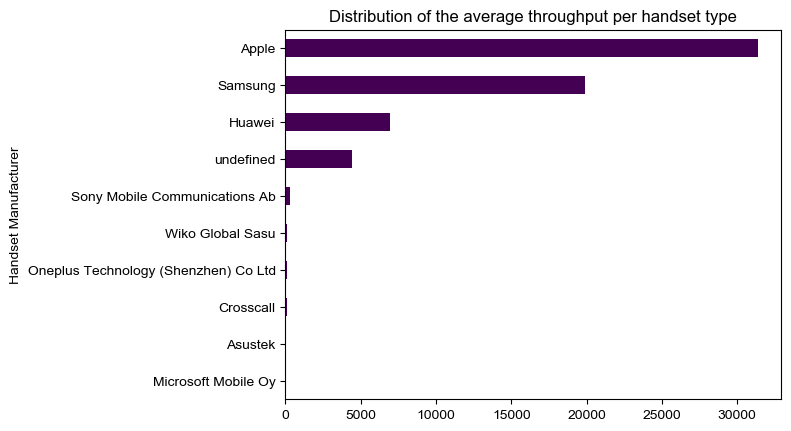

In [280]:
data3.groupby(['Handset Manufacturer']).count().sort_values(by='Total Avg Bearer').tail(10)['Total Avg Bearer'].plot(kind='barh',colormap='viridis')
plt.title('Distribution of the average throughput per handset type')
plt.style.use('seaborn')
plt.savefig('Dist average throuput.jpg',bbox_inches='tight')

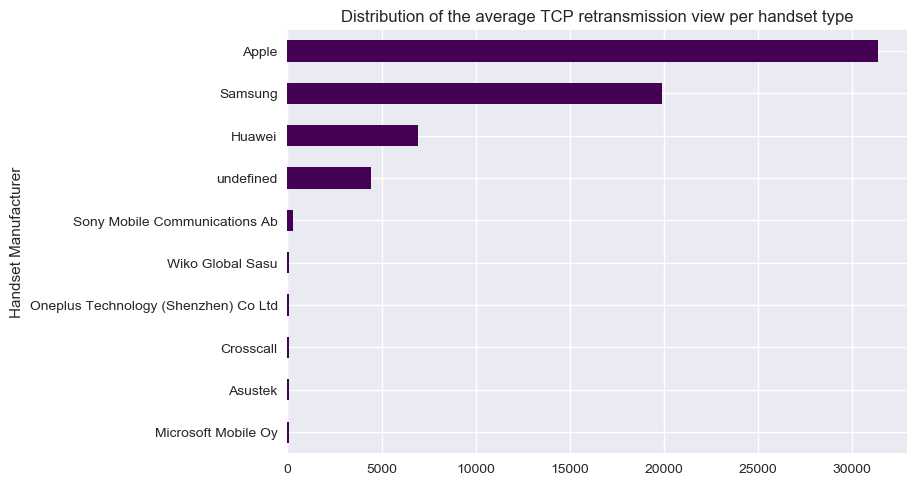

In [281]:
data3.groupby(['Handset Manufacturer']).count().sort_values(by='Total TCP DL Retrans. Vol (Bytes)').tail(10)['Total TCP DL Retrans. Vol (Bytes)'].plot(kind='barh',colormap='viridis')
plt.title('Distribution of the average TCP retransmission view per handset type')
plt.style.use('seaborn')
plt.savefig('average TCP retransmission view.jpg',bbox_inches='tight')

In [84]:
encoder = ce.BaseNEncoder(base=4)

data_t=encoder.fit_transform(data3)
scaler=StandardScaler()
#data_t=scaler.fit_transform(data3)

In [95]:
#data3[data3.columns[:]]
data3_g=data3.groupby(['MSISDN/Number']).sum()
data3_g.columns

Index(['Total Avg RTT', 'Total Avg Bearer',
       'Total TCP DL Retrans. Vol (Bytes)'],
      dtype='object')

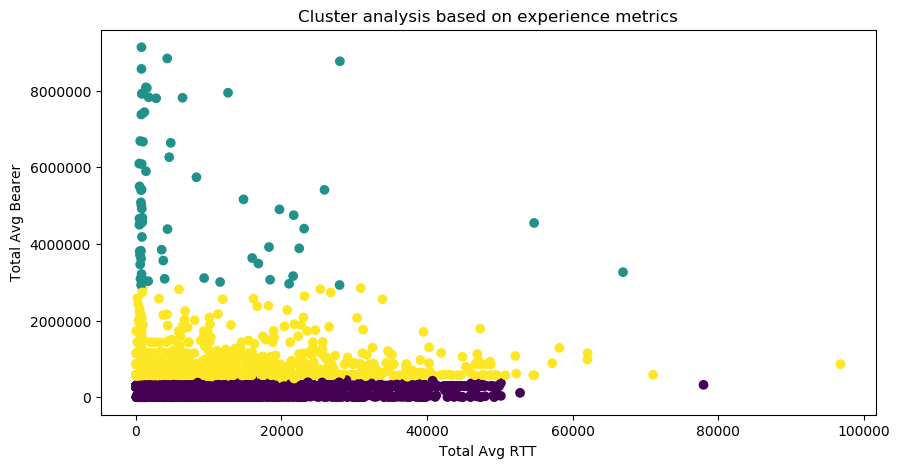

In [96]:
#import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10, 5))
X=data3_g.values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
assignments = kmeans.labels_
ax.scatter(X[:, 1], X[:, 2], c=100*assignments,marker='o')
#ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='^',c='r',s=[120,150])

ax.set_title('Cluster analysis based on experience metrics')
ax.set_xlabel('Total Avg RTT', size=10)
ax.set_ylabel('Total Avg Bearer',size=10)
fig.savefig('cluster_3.4.jpg')

In [98]:
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
data3_g['cluster']=kmeans.predict(data3_g.values)

In [99]:
#data3_g.loc[data3['cluster']==0]
for i in range(3):
    data3_g.loc[data3_g['cluster']==i].describe().to_csv(str(i)+'-3.4_cluster.csv')

In [299]:
data3_g.loc[data3_g['cluster']==0].describe()

,Total Avg RTT,Total Avg Bearer,Total TCP DL Retrans. Vol (Bytes),cluster
count,8537.000000,8537.000000,8.537000e+03,8537.0
mean,99.225319,2071.355394,6.444109e+05,0.0
std,41.858521,6122.724589,1.965300e+05,0.0
min,22.000000,0.000000,4.666510e+05,0.0
25%,75.000000,171.000000,5.743306e+05,0.0
50%,88.885322,212.000000,5.743306e+05,0.0
75%,114.442661,494.000000,5.743306e+05,0.0
max,511.000000,96769.000000,2.871903e+06,0.0


In [300]:
data3_g.loc[data3_g['cluster']==1].describe()

,Total Avg RTT,Total Avg Bearer,Total TCP DL Retrans. Vol (Bytes),cluster
count,44657.000000,44657.000000,44657.000000,44657.0
mean,44.473174,938.695546,280080.806864,1.0
std,17.483920,4059.250992,43829.461134,0.0
min,0.000000,0.000000,143.000000,1.0
25%,33.000000,77.000000,287165.315853,1.0
50%,44.442661,97.000000,287165.315853,1.0
75%,46.000000,118.000000,287165.315853,1.0
max,213.442661,77969.000000,461976.000000,1.0


In [301]:
data3_g.loc[data3_g['cluster']==2].describe()

,Total Avg RTT,Total Avg Bearer,Total TCP DL Retrans. Vol (Bytes),cluster
count,65.000000,65.000000,6.500000e+01,65.0
mean,93.074912,8126.584615,5.174844e+06,2.0
std,57.762342,12688.493513,1.857570e+06,0.0
min,25.000000,460.000000,2.927893e+06,2.0
25%,56.000000,765.000000,3.614377e+06,2.0
50%,78.000000,1385.000000,4.682999e+06,2.0
75%,115.000000,12657.000000,6.637887e+06,2.0
max,333.442661,66907.000000,9.133155e+06,2.0


##task 4

In [303]:
min_c=kmeans.cluster_centers_[::,1]
min_d=kmeans2.cluster_centers_[::,1]
min_c
#dist = numpy.linalg.norm(a-b)

array([2071.35539417,  938.69554605, 8126.58461538])

Total Avg RTT                            75.442661
Total Avg Bearer                       8871.000000
Total TCP DL Retrans. Vol (Bytes)    574330.631705
cluster                                   0.000000
Name: 33603006821.0, dtype: float64

In [313]:
#assignment1=exp_score(data3)
assignment=[]
for i in range(len(data3_g.index)):
        a=data3_g.iloc[i][:-1].values
        assignment.append(distance.euclidean(a, min_c))

In [324]:
assignment1=[]
for i in range(len(cluster_data.index)):
        a=cluster_data.iloc[i][:-1].values
        assignment1.append(distance.euclidean(a, min_d))

In [331]:
final_df=pd.DataFrame({'MSISDN/Number':data['MSISDN/Number'].unique(),'experience score':assignment,'engagement score':assignment1})

In [332]:
final_df['satisfaction score']=(final_df['experience score']+final_df['engagement score'])/2

In [336]:
final_df.sort_values(by='satisfaction score').tail(10).to_csv('satisfaction.csv')

In [344]:
X=final_df[final_df.columns[:-1]]
y=final_df[final_df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

In [347]:
las=Lasso(alpha=0.1)
las.fit(X_train,y_train)
las.score(X_test,y_test)

1.0

In [351]:
kmeans3=KMeans(n_clusters=2)
kmeans3.fit(X)
final_df['cluster']=kmeans3.predict(X)

In [364]:
final_df.groupby(['cluster'])['experience score','satisfaction score'].count().to_csv('Satisafaction_cluster.csv')

In [399]:
final_df=final_df[final_df.columns[:-1]]

params = urllib.parse.quote_plus(r'DRIVER={SQL Server};SERVER=.\SQLEXPRESS;DATABASE=Mydb;Trusted_Connection=yes')
conn_str = 'mssql+pyodbc:///?odbc_connect={}'.format(params)
engine = sqlalchemy.create_engine(conn_str)
final_df.to_sql(name ='Satisfaction', con = engine, if_exists = 'replace', index = False)
